Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<AxesSubplot: >

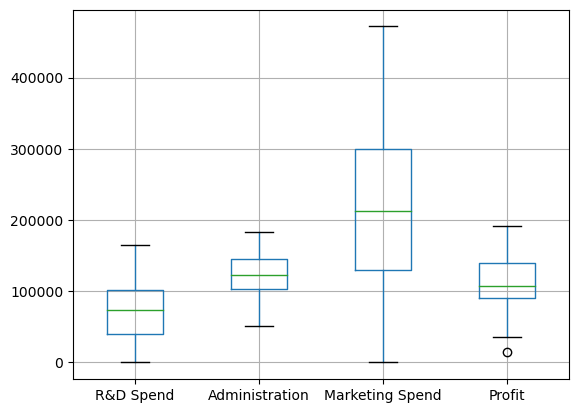

In [4]:
data.boxplot(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'])

**Based on box plot we can see there are hardly any outliers**

In [5]:
data1=data.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MS'},axis=1)
data1.head()

,RDS,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   Admin   50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data1.describe()

,RDS,Admin,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data1.corr(numeric_only=True)

,RDS,Admin,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
sns.heatmap(data1.corr(), annot=True)

/tmp/ipykernel_531620/3168792321.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True)


<AxesSubplot: >

In [10]:
data1[data1.duplicated()]

,RDS,Admin,MS,State,Profit


In [11]:
sns.pairplot(data1)

In [12]:
model=smf.ols("Profit~RDS+Admin+MS",data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        18:08:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [14]:
model.tvalues,'\n',np.round(model.pvalues,4) #MS & Admin are insignificant

(Intercept     7.626218
 RDS          17.846374
 Admin        -0.525507
 MS            1.655077
 dtype: float64,
 '\n',
 Intercept    0.0000
 RDS          0.0000
 Admin        0.6018
 MS           0.1047
 dtype: float64)

In [15]:
model.rsquared,model.rsquared_adj #Already the model is 95.07% accurate

(0.9507459940683246, 0.9475337762901719)

In [16]:
a=smf.ols("Profit~Admin",data=data1).fit()
a.pvalues #Admin is insignificant

Intercept    0.003824
Admin        0.162217
dtype: float64

In [17]:
m=smf.ols("Profit~MS",data=data1).fit()
m.pvalues #MS is significant

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

In [18]:
co=smf.ols("Profit~Admin+MS",data=data1).fit()
np.round(co.pvalues,4) #both the variables are significant

Intercept    0.2589
Admin        0.0173
MS           0.0000
dtype: float64

In [19]:
rsq_rds=smf.ols("RDS~Admin+MS",data=data1).fit().rsquared
vif_rds=1/(1-rsq_rds)
vif_rds

2.4689030699947017

In [20]:
rsq_A=smf.ols("Admin~RDS+MS",data=data1).fit().rsquared
vif_A=1/(1-rsq_A)
vif_A

1.1750910070550455

In [21]:
rsq_ms=smf.ols("MS~Admin+RDS",data=data1).fit().rsquared
vif_ms=1/(1-rsq_ms)
vif_ms

2.326773290530878

In [22]:
q=pd.DataFrame({"Variable":["RDS","Admin","MS"],"VIF":[vif_rds,vif_A,vif_ms]})
q #Since VIF<3 there is no collinearity among the variables

,Variable,VIF
0,RDS,2.468903
1,Admin,1.175091
2,MS,2.326773


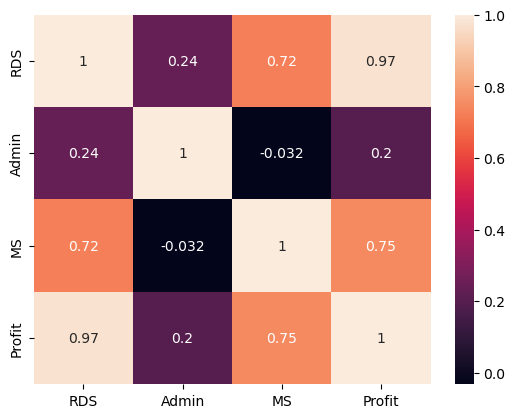

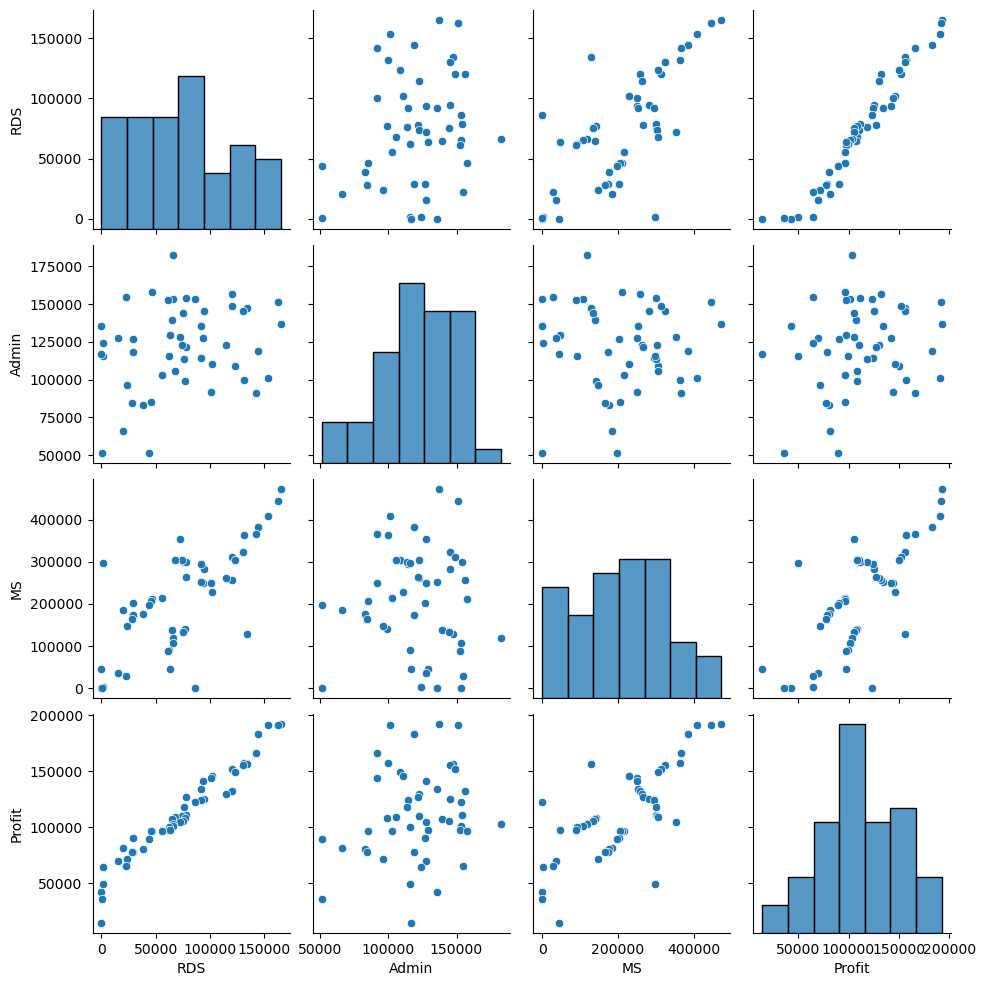

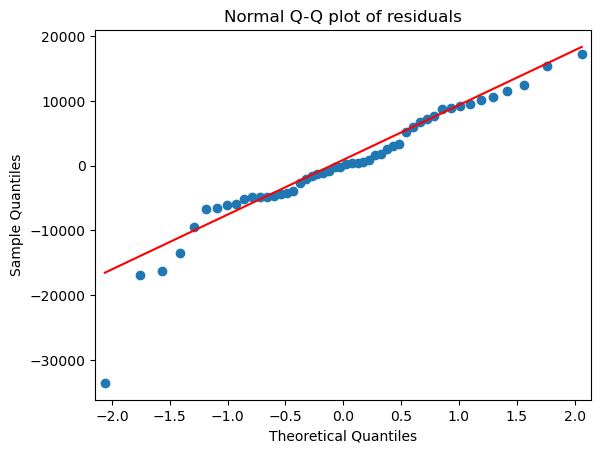

In [23]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
list(np.where(model.resid<-30000))

[array([49])]

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() #z=(x-mu)/sigma

In [26]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [27]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

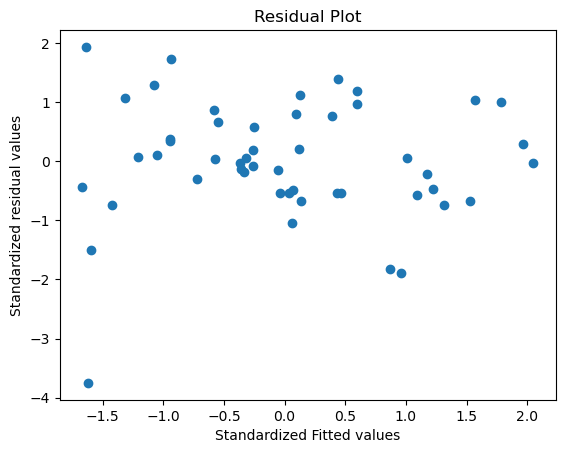

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


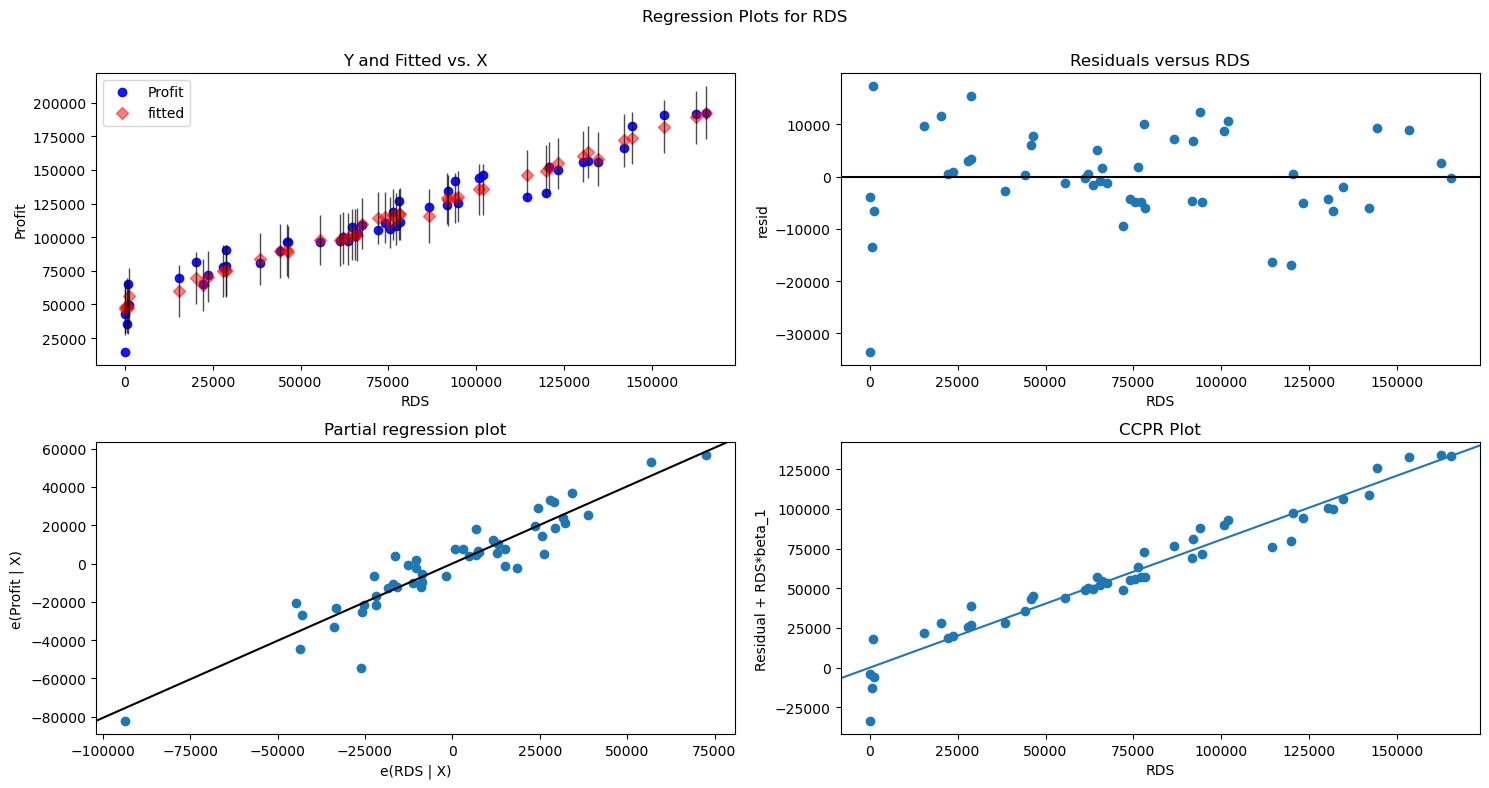

In [29]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


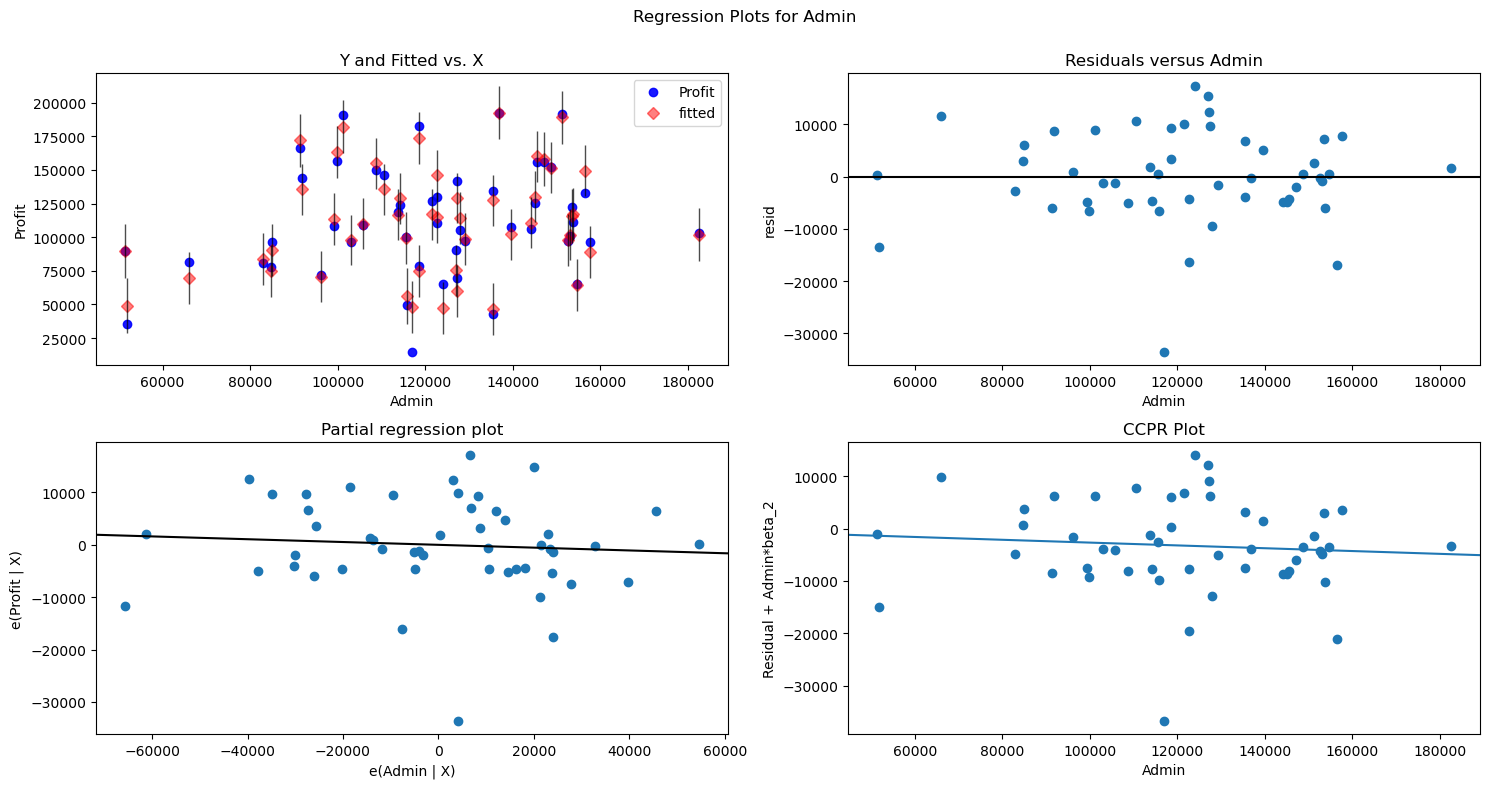

In [30]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

eval_env: 1


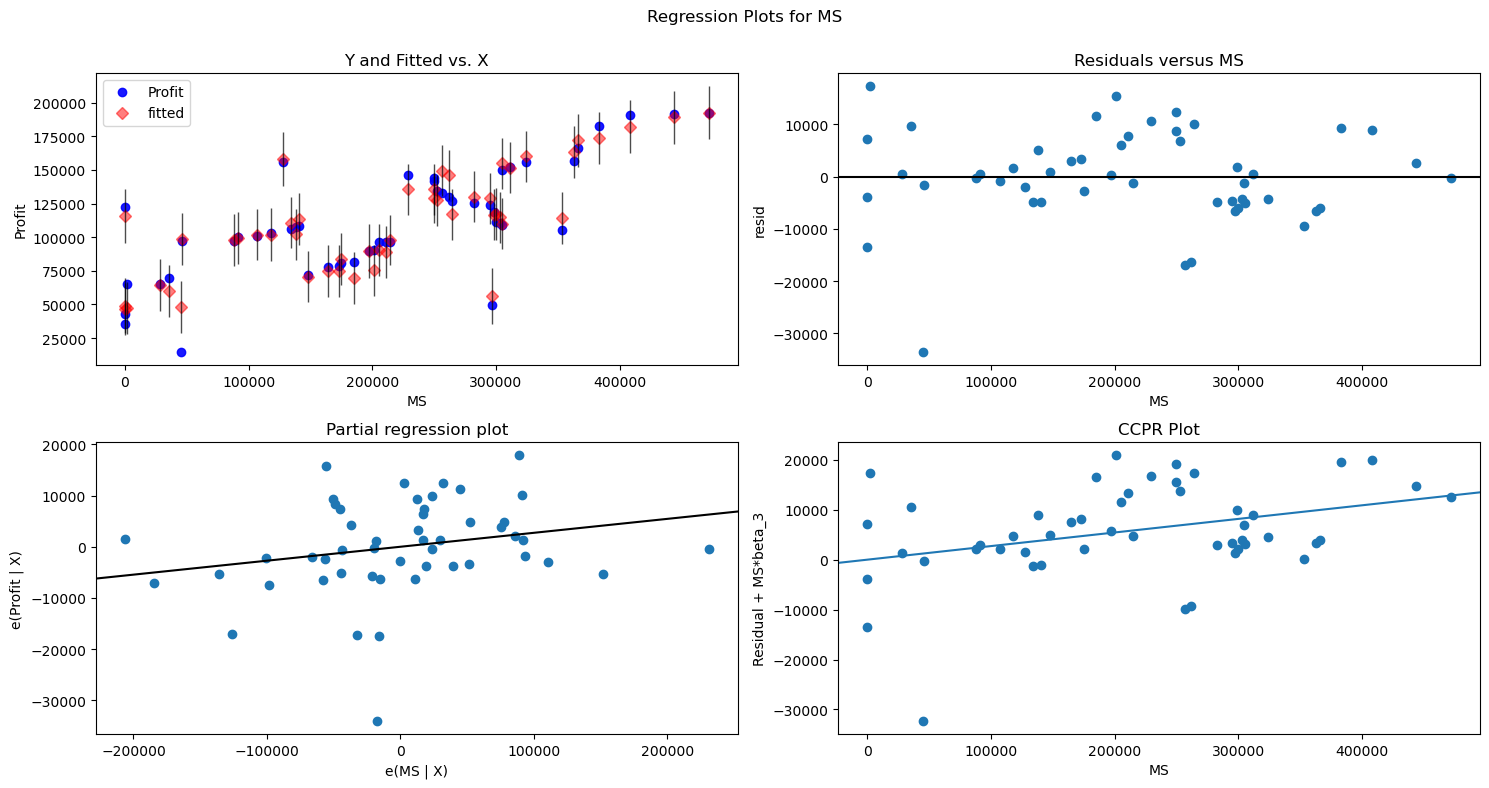

In [31]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

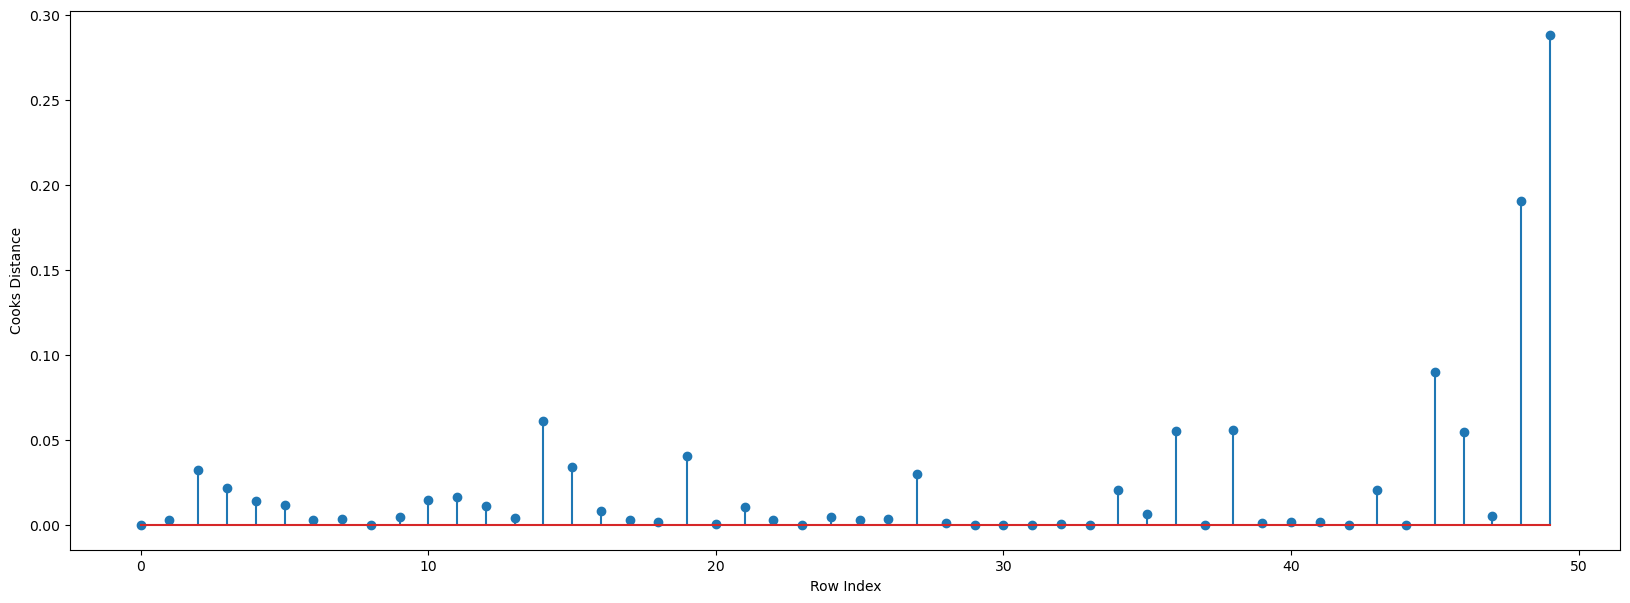

In [33]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
np.argmax(c),np.max(c) #model is already preety accurate but lets try whether removing the argmax value may increse the accuracy

(49, 0.2880822927543276)

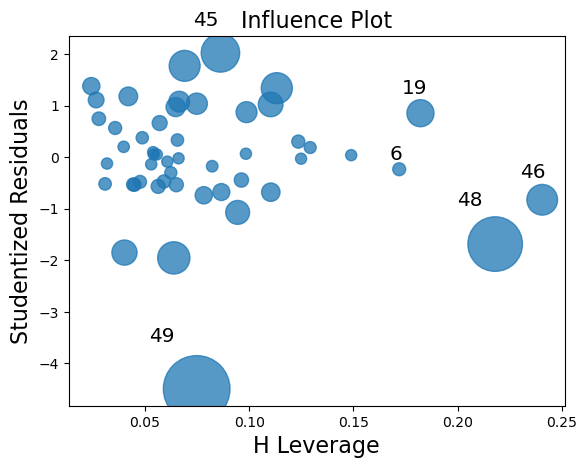

In [35]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [36]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff #no outliers

0.36

In [37]:
data1[data1.index.isin([49])]

,RDS,Admin,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [38]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.head()

,RDS,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
data2[data2.index.isin([49])]

,RDS,Admin,MS,State,Profit


In [40]:
model1=smf.ols("Profit~RDS+Admin+MS",data=data2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           8.85e-32
Time:                        18:08:58   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model1.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
MS               0.025234
dtype: float64

In [42]:
model1.tvalues,'\n',np.round(model1.pvalues,4)

(Intercept     9.450782
 RDS          20.469501
 Admin        -0.517889
 MS            1.825383
 dtype: float64,
 '\n',
 Intercept    0.0000
 RDS          0.0000
 Admin        0.6071
 MS           0.0746
 dtype: float64)

In [43]:
model1.rsquared,model1.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [44]:
model1_influence = model1.get_influence()
(v, _) = model1_influence.cooks_distance
v

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

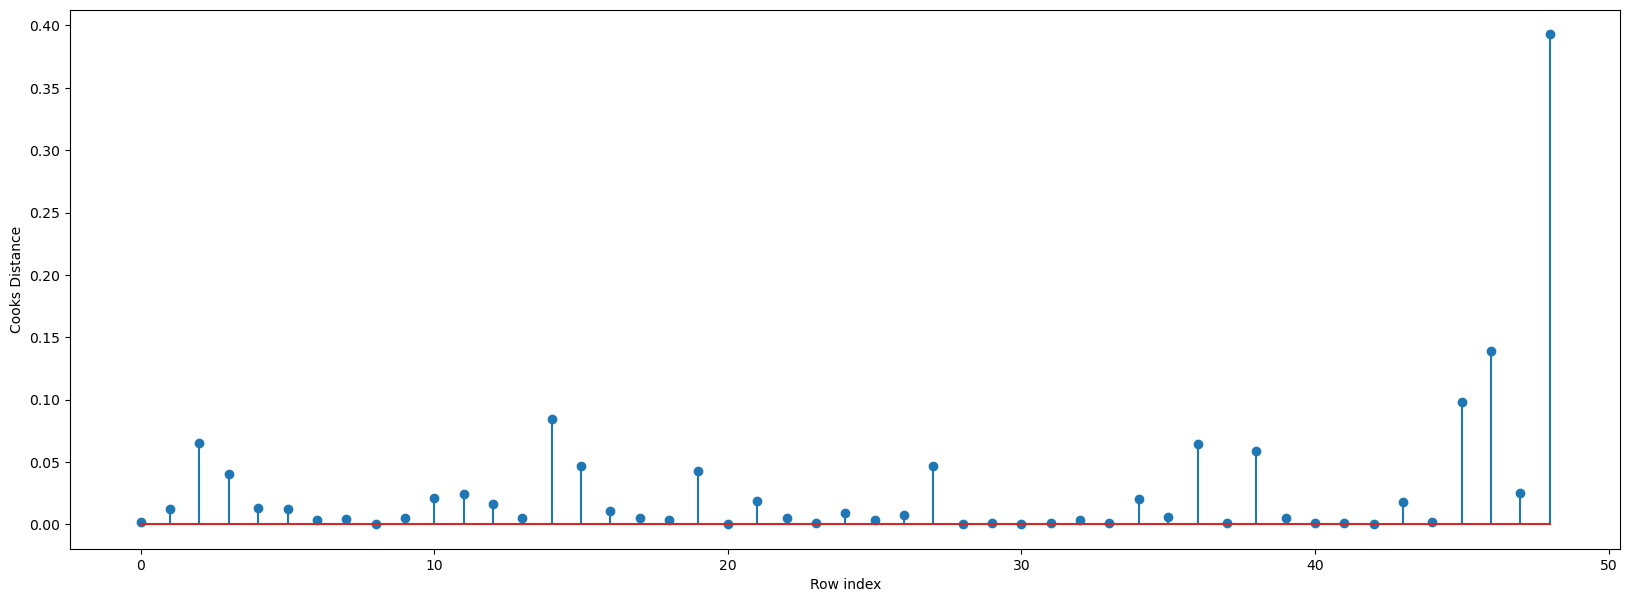

In [45]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(v, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
np.argmax(v),np.max(v)

(48, 0.39274420556321293)

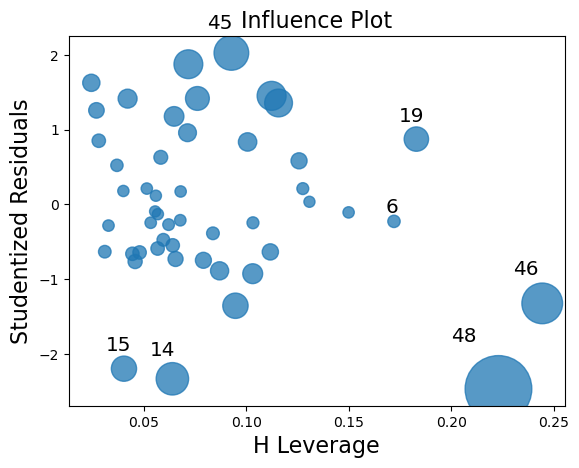

In [47]:
influence_plot(model1)
plt.show()

In [48]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff1 = 3*((k + 1)/n)
leverage_cutoff1

0.36734693877551017

In [49]:
#predict model
new=pd.DataFrame({'RDS':237376,'Admin':142324,'MS':175809},index=[1])
new

,RDS,Admin,MS
1,237376,142324,175809


In [50]:
model1.predict(new)

1    239524.802509
dtype: float64

In [51]:
model1.predict(data2)

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64